## 1. Loading and inspecting the data

In [2]:
import pandas as pd

#Load the uploaded Green Bonds dataset
file_path= "C:/Users/mocho/Desktop/Data Cleaning and Visualizations/Green_Bonds.CSV"
green_bonds_df = pd.read_csv(file_path)

# Display the first few rows and basic info to inspect the dataset
green_bonds_head = green_bonds_df.head()
green_bonds_info = green_bonds_df.info()
print(green_bonds_head)
print(green_bonds_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ObjectId             355 non-null    int64  
 1   Country              355 non-null    object 
 2   ISO2                 106 non-null    object 
 3   ISO3                 355 non-null    object 
 4   Indicator            355 non-null    object 
 5   Unit                 355 non-null    object 
 6   Source               355 non-null    object 
 7   CTS_Code             353 non-null    object 
 8   CTS_Name             353 non-null    object 
 9   CTS_Full_Descriptor  353 non-null    object 
 10  Type_of_Issuer       355 non-null    object 
 11  Use_of_Proceed       355 non-null    object 
 12  Principal_Currency   355 non-null    object 
 13  F1985                6 non-null      float64
 14  F1986                4 non-null      float64
 15  F1987                4 non-null      flo

The Green Bonds dataset is loaded! Here's what we found:

## Initial Observations
*  355 rows and 42 columns
* Key columns:
        
    * Country, ISO Codes, Indicator, Type of Issuer, Use of Proceed, and Principal Currency
    * Year-wise columns (F1985 to F2022) for bond issuance amounts (mostly in billions of US dollars)
* Many missing values in earlier years, but more complete data for recent years (e.g., F2022).
* *Some columns like ISO2 and CTS_Code have sparse data.*

## Step 1: Plan for Data Cleaning
We’ll follow these steps:

+ Handle missing values (especially in financial year columns).
+ Standardize column names for easier access.
+ Remove duplicates.
+ Ensure data consistency (e.g., country names and currency).
+ Generate a summary markdown file documenting the process.


## Plan for Handling Missing Values:
- ***Year-wise columns (F1985–F2022)***: These represent financial values.
    * Fill missing values with 0 where data might indicate no issuance.
    * Retain rows with more recent data for meaningful analysis.
- ***Sparse columns (like ISO2, CTS_Code)***: Drop or keep depending on usefulness.


In [3]:
#Identify columns related to financial years (F1985 to F2022)
year_columns = [col for col in  green_bonds_df.columns if col.startswith('F')]

#Fill missing values in year columns with 0
green_bonds_df[year_columns] = green_bonds_df[year_columns].fillna(0)

#Count remaining missing values in the dataset (to decide next steps)
missing_values_count = green_bonds_df.isnull().sum()
missing_values_count

ObjectId                 0
Country                  0
ISO2                   249
ISO3                     0
Indicator                0
Unit                     0
Source                   0
CTS_Code                 2
CTS_Name                 2
CTS_Full_Descriptor      2
Type_of_Issuer           0
Use_of_Proceed           0
Principal_Currency       0
F1985                    0
F1986                    0
F1987                    0
F1990                    0
F1991                    0
F1992                    0
F1993                    0
F1994                    0
F1999                    0
F2000                    0
F2002                    0
F2003                    0
F2004                    0
F2007                    0
F2008                    0
F2009                    0
F2010                    0
F2011                    0
F2012                    0
F2013                    0
F2014                    0
F2015                    0
F2016                    0
F2017                    0
F

## Step 2: Standardize Column Names
We’ll make the column names more readable and consistent by:

* Converting them to lowercase.
* Replacing spaces with underscores for easier access in Python.
* Removing any special characters.

In [4]:
#Standardize column names : convert to lowercase, replace spaces with underscores, and remove special characters

green_bonds_df.columns = (
    green_bonds_df.columns.str.lower()
    .str.replace(" ","_")
    .str.replace("[^a-z0-9]","", regex = True)
)

#Display the updated column names
green_bonds_df.columns.tolist()

['objectid',
 'country',
 'iso2',
 'iso3',
 'indicator',
 'unit',
 'source',
 'ctscode',
 'ctsname',
 'ctsfulldescriptor',
 'typeofissuer',
 'useofproceed',
 'principalcurrency',
 'f1985',
 'f1986',
 'f1987',
 'f1990',
 'f1991',
 'f1992',
 'f1993',
 'f1994',
 'f1999',
 'f2000',
 'f2002',
 'f2003',
 'f2004',
 'f2007',
 'f2008',
 'f2009',
 'f2010',
 'f2011',
 'f2012',
 'f2013',
 'f2014',
 'f2015',
 'f2016',
 'f2017',
 'f2018',
 'f2019',
 'f2020',
 'f2021',
 'f2022']

## Step 3: Remove Duplicates
We’ll check for and remove any duplicate rows in the dataset.

In [5]:
# Check for duplicated rows in the dataset
duplicate_rows = green_bonds_df.duplicated().sum()

#Remove duplicates if any exist
green_bonds_df_cleaned = green_bonds_df.drop_duplicates()

# Display the number of duplicates dfound and confirm the cleaned dataset shape
duplicate_rows, green_bonds_df_cleaned.shape

(0, (355, 42))

## Step 4: Ensure Data Consistency
We’ll focus on:

* ***Country Names and Codes***: Ensure no typos or mismatched formats.
* ***Currency Consistency***: Check if the Principal Currency column uses consistent labels (like USD, EUR, etc.).
* ***Data Types***: Convert columns like financial years (F1985–F2022) to numeric and ensure no anomalies.

In [6]:
# Check data types and unique values in key columns for consitency

data_types = green_bonds_df.dtypes
unique_countries = green_bonds_df['country'].unique()
unique_currencies = green_bonds_df['principalcurrency'].unique()

data_types, unique_countries[:10], unique_currencies[:10]

(objectid               int64
 country               object
 iso2                  object
 iso3                  object
 indicator             object
 unit                  object
 source                object
 ctscode               object
 ctsname               object
 ctsfulldescriptor     object
 typeofissuer          object
 useofproceed          object
 principalcurrency     object
 f1985                float64
 f1986                float64
 f1987                float64
 f1990                float64
 f1991                float64
 f1992                float64
 f1993                float64
 f1994                float64
 f1999                float64
 f2000                float64
 f2002                float64
 f2003                float64
 f2004                float64
 f2007                float64
 f2008                float64
 f2009                float64
 f2010                float64
 f2011                float64
 f2012                float64
 f2013                float64
 f2014    

Here’s what we found:

* **Country names**: They seem mostly consistent, but one example stands out—Belarus, Rep. of might be worth standardizing to just Belarus.
* **Currencie**s: There’s some variety, including terms like Not Applicable, which we might want to clean or replace.

## Next step:
* **Standardize country names** (e.g., remove extra descriptors like "Rep. of").
* **Handle non-currency values** like Not Applicable in Principal_Currency.


- **Standardizing Country Names** – Simplifying country names by removing phrases like "Rep. of".
- **Handling** Not Applicable **in Principal_Currency** – Replacing it with Unknown or N/A.


In [7]:
# Standardize country names by removing phrases like "Rep. of"
green_bonds_df['country'] = green_bonds_df['country'].str.replace(r",\s*Rep\. of", "", regex=True)

#Replace 'Not Applicable' in principalcurrency with 'Unknown'
green_bonds_df['principalcurrency'] = green_bonds_df['principalcurrency'].replace('Not Applicable','Unknown')


# Check the updated unique values
updated_countries = green_bonds_df['country'].unique()
updated_currencies = green_bonds_df['principalcurrency'].unique()

updated_countries[:10], updated_currencies[:10]

(array(['Argentina', 'Australia', 'Austria', 'Bangladesh', 'Belarus',
        'Belgium', 'Bermuda', 'Brazil', 'British Virgin Islands', 'Canada'],
       dtype=object),
 array(['Unknown', 'Argentinian Peso',
        'Argentinian Unidades de Valor Adquisitivo', 'Australian Dollar',
        'Bangladeshi Taka', 'Brazilian Real', 'British Pound',
        'Canadian Dollar', 'Chilean Peso', 'Chilean Unidad de Fomento'],
       dtype=object))

* **Country Names**: Simplified and standardized (e.g., Belarus, Rep. of is now just Belarus).
* **Principal_Currency**: Not Applicable has been replaced with Unknown.


- **Convert Financial Year Columns (F1985–F2022) to numeric types.**
- **Detect outliers or incorrect values in these columns.**


In [8]:
# Convert financial year columns (F1985-F2022) to numeric and handle any conversion issues
year_columns= [col for col in green_bonds_df.columns if col.startswith('F')]
green_bonds_df[year_columns] = green_bonds_df[year_columns].apply(pd.to_numeric, errors='coerce')

# Detect outliers or incorrect values (e.g., negative values or excessively large amounts)
outliers = green_bonds_df[year_columns][(green_bonds_df[year_columns] < 0) | (green_bonds_df[year_columns] > 1e9)].stack()


# Count and display a sample of outliers
outliers_count = outliers.count()
outliers_sample = outliers.head(10)

outliers_count, outliers_sample

(0, Series([], dtype: float64))

Good news—no outliers were detected in the financial year columns! 🎉

## Next Steps:
- **Verify Data Types** to ensure everything is in the correct format.
* **Export the cleaned dataset** for visualization.

In [10]:
# Verify data types to ensure all columns have appropriate formats
verified_data_types = green_bonds_df.dtypes

# Export the cleaned dataset to a new CSV file
cleaned_file_path = "C:/Users/mocho/Desktop/Data Cleaning and Visualizations/Green_Bonds_Cleaned.csv"
green_bonds_df.to_csv(cleaned_file_path, index=False)

verified_data_types, cleaned_file_path

(objectid               int64
 country               object
 iso2                  object
 iso3                  object
 indicator             object
 unit                  object
 source                object
 ctscode               object
 ctsname               object
 ctsfulldescriptor     object
 typeofissuer          object
 useofproceed          object
 principalcurrency     object
 f1985                float64
 f1986                float64
 f1987                float64
 f1990                float64
 f1991                float64
 f1992                float64
 f1993                float64
 f1994                float64
 f1999                float64
 f2000                float64
 f2002                float64
 f2003                float64
 f2004                float64
 f2007                float64
 f2008                float64
 f2009                float64
 f2010                float64
 f2011                float64
 f2012                float64
 f2013                float64
 f2014    

## Visualizations Road map
* **Trends Over Time** – Green Bond issuance from 1985 to 2022.
* **Geographic Insights** – Countries with the highest issuance.
* **Currency Distribution** – See how different currencies are involved.

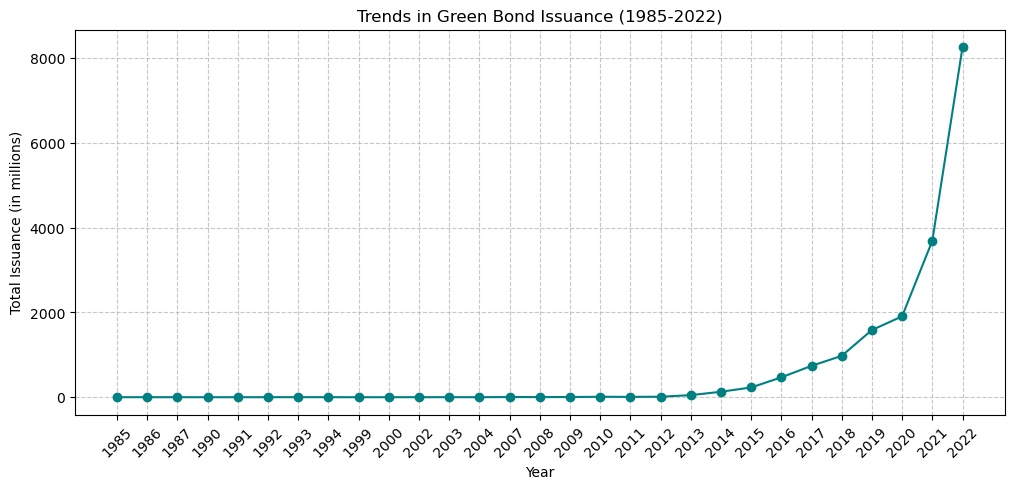

In [11]:
## Trends Over Time
import matplotlib.pyplot as plt

# Sum the issuance across all financial year columns (F1985-F2022) to get totals oer year
file_path= "C:/Users/mocho/Desktop/Data Cleaning and Visualizations/Green_Bonds_Cleaned.csv"
clean_green_bonds_df = pd.read_csv(file_path)
yearly_totals = clean_green_bonds_df[[col for col in clean_green_bonds_df.columns if col.startswith('f')]].sum()


# Plot the trend over time
plt.figure(figsize=(12,5))
plt.plot(yearly_totals.index.str.replace('f',''), yearly_totals.values, marker ='o',linestyle='-', color='teal')
plt.title('Trends in Green Bond Issuance (1985-2022)')
plt.xlabel('Year')
plt.ylabel('Total Issuance (in millions)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

plt.savefig('green_bond_trend.png')

plt.show()

* **Geographic Insights** – identifying the countries with the highest green bond issuance.

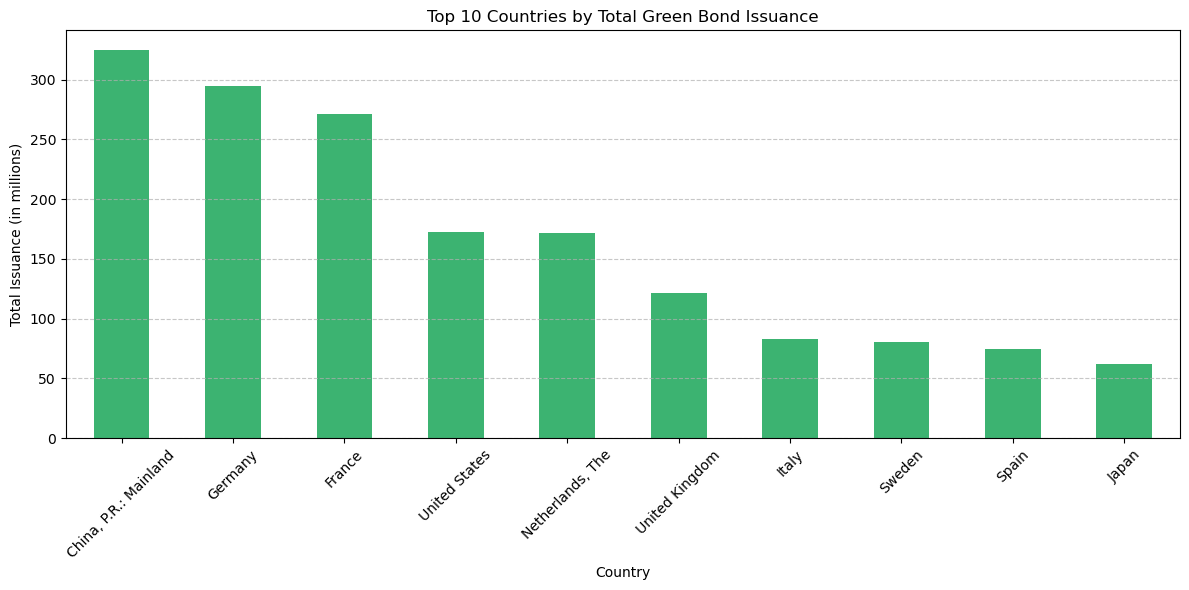

In [12]:
#Remove rows where 'country' is 'Wolrd'
clean_green_bonds_df = clean_green_bonds_df[clean_green_bonds_df['country'] != 'World']

# Group by 'country' and calculate the total issuance for each country across all financial years
country_totals = clean_green_bonds_df.groupby('country')[[col for col in clean_green_bonds_df.columns if col.startswith('f')]].sum()

# Sum across all years and sort in descending order to get the top 10 countries
top_countries = country_totals.sum(axis=1).sort_values(ascending=False).head(10)

# Plot the top 10 countries
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='mediumseagreen')
plt.title('Top 10 Countries by Total Green Bond Issuance')
plt.xlabel('Country')
plt.ylabel('Total Issuance (in millions)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

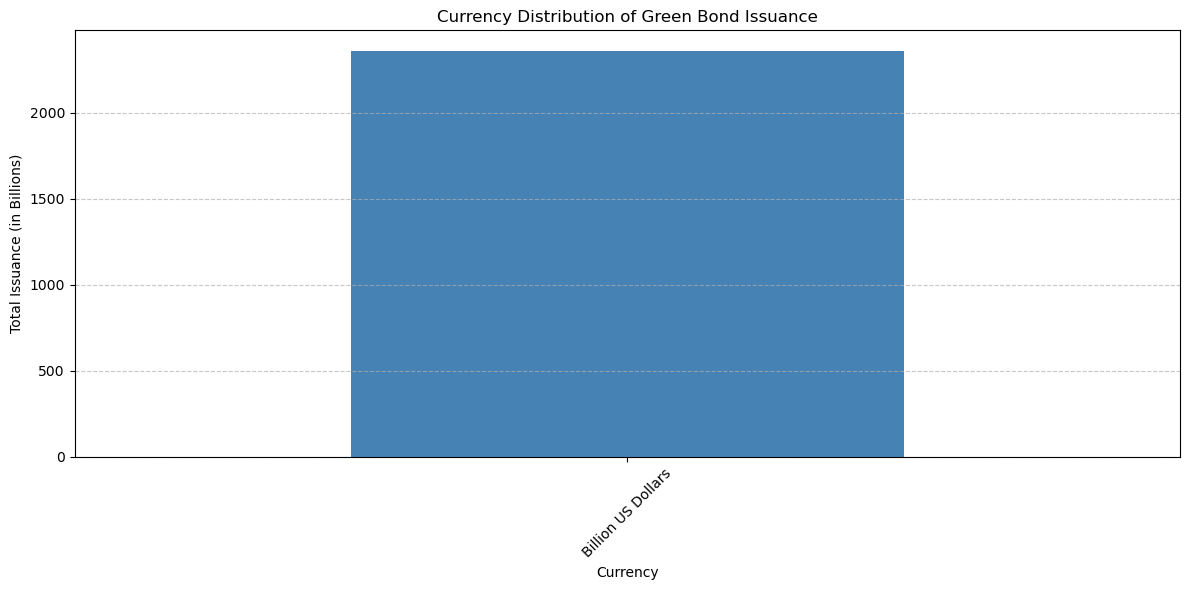

In [13]:
# Group by 'Currency' and calculate total issuance for each currency across all years
currency_totals = clean_green_bonds_df.groupby('unit')[[col for col in clean_green_bonds_df.columns if col.startswith('f')]].sum()

# Sum across all years and sort in descending order
currency_totals_sum = currency_totals.sum(axis=1).sort_values(ascending=False)

# Plot the currency distribution as a bar chart
plt.figure(figsize=(12, 6))
currency_totals_sum.plot(kind='bar',color='steelblue')
plt.title('Currency Distribution of Green Bond Issuance')
plt.xlabel('Currency')
plt.ylabel('Total Issuance (in Billions)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Saving the cleaned dataset
# Export the cleaned dataset to a new CSV file
cleaned_file_path = "C:/Users/mocho/Desktop/Data Cleaning and Visualizations/Green_Bonds_Cleaned.csv"
green_bonds_df.to_csv(cleaned_file_path, index=False)